# Assignment 4

Note: The evaluation of this assignment will focus more on your analysis and observations rather than just implementations. Ensure you provide supporting graphs and visualizations, beyond those explicitly mentioned in the questions, to justify your claims effectively.
Please make sure to run all the cells before submission so that all plots are visible for evaluation.

## Question 1: Regularization

- (a). Starting with the Boston Housing dataset, perform necessary data preprocessing steps, explaining the importance of each step. Plot a correlation heatmap (matrix) of the dataset’s features and analyze the relationships between them. Provide a brief discussion on the significance of the observed correlations and their potential impact on regression modeling. Additionally, include other visualizations or observations that appeared interesting while analyzing the dataset.

- (b) Compare the performance of Ridge Regression with Linear Regression. Analyze the impact of different values of the regularization parameter (alpha) on model performance. Plot a graph showing test error vs weight alpha. Employ ```GridSearchCV``` which uses cross-validation to search for best alpha and report the value.

- (c) Repeat same with California Housing Dataset.

- (d) Comment on whether Ridge Regression improves generalization compared to Linear Regression when applied to these datasets. Describe the characteristics of a dataset where Ridge Regression would be crucial.

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                                       # Has good utility to plot heatmap. You can use others as you see fit.
from sklearn.model_selection import train_test_split        # To split data, 0.8: Train, 0.2: Test
from sklearn.linear_model import Ridge, LinearRegression    # Use the models from sklearn, see their documentations
from sklearn.datasets import fetch_openml                   # For loading data
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error              # Metric for comparing performace
import pandas as pd

data = fetch_openml(name="boston", version=1, as_frame=True)
# data = fetch_california_housing()


X, y = pd.DataFrame(data.data, columns=data.feature_names), data.target
## Add cells for your code / comments

print("Shape of dataset:", X.shape)
print("Checking missing values:\n", X.isnull().sum())

Shape of dataset: (506, 13)
Checking missing values:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64


# **Question 1(a)**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

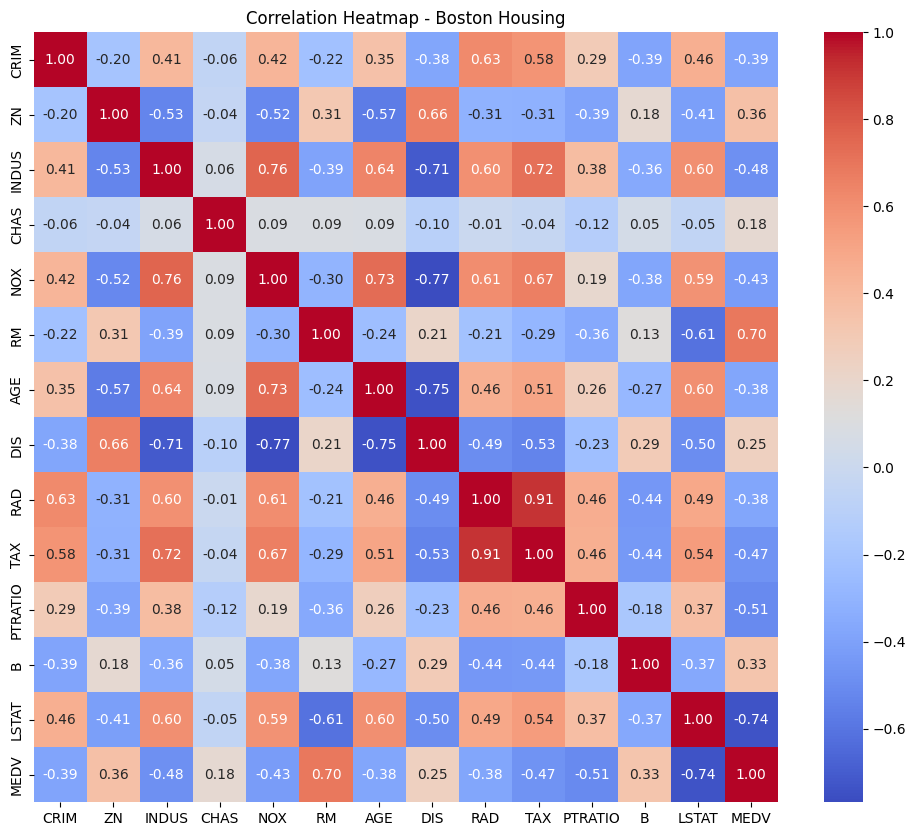

In [ ]:
# Combine X and y into one DataFrame
df = X.copy()
df['MEDV'] = y  # MEDV = Median value of owner-occupied homes (target)

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap - Boston Housing")
plt.show()


**Observations:**
* TAX and RAD have high correlation (≈ 0.91) indicating potential multicollinearity followed by INDUS vs NOX (≈ 0.76) , AGE vs NOX (≈0.73) and so on
* RM (rooms per dwelling) is positively correlated with house prices (MEDV, corr ≈ 0.70).

* Similarly LSTAT (% lower status population) has a strong negative correlation with MEDV (≈ -0.74).

* *Regularization* like Ridge may help in this scenario.

**Some Interesting Visualizations**

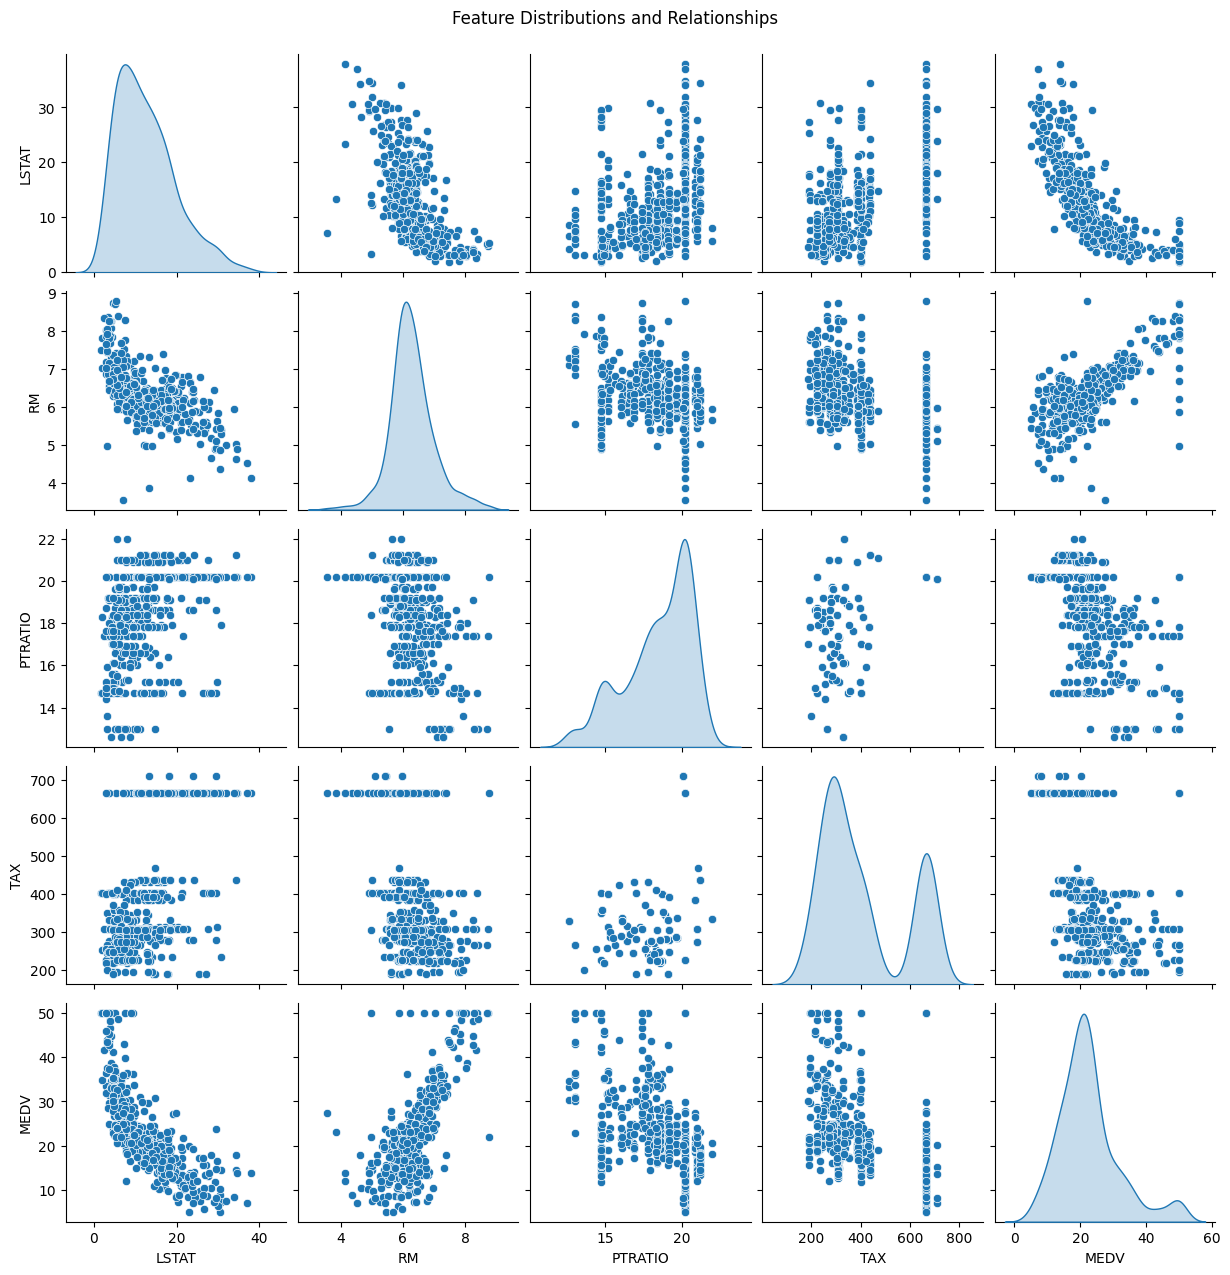

In [ ]:
# Pairplot for top correlated features
top_features = ['LSTAT', 'RM', 'PTRATIO', 'TAX', 'RAD', 'MEDV']
sns.pairplot(df[top_features], diag_kind="kde")
plt.suptitle("Feature Distributions and Relationships", y=1.02)
plt.show()



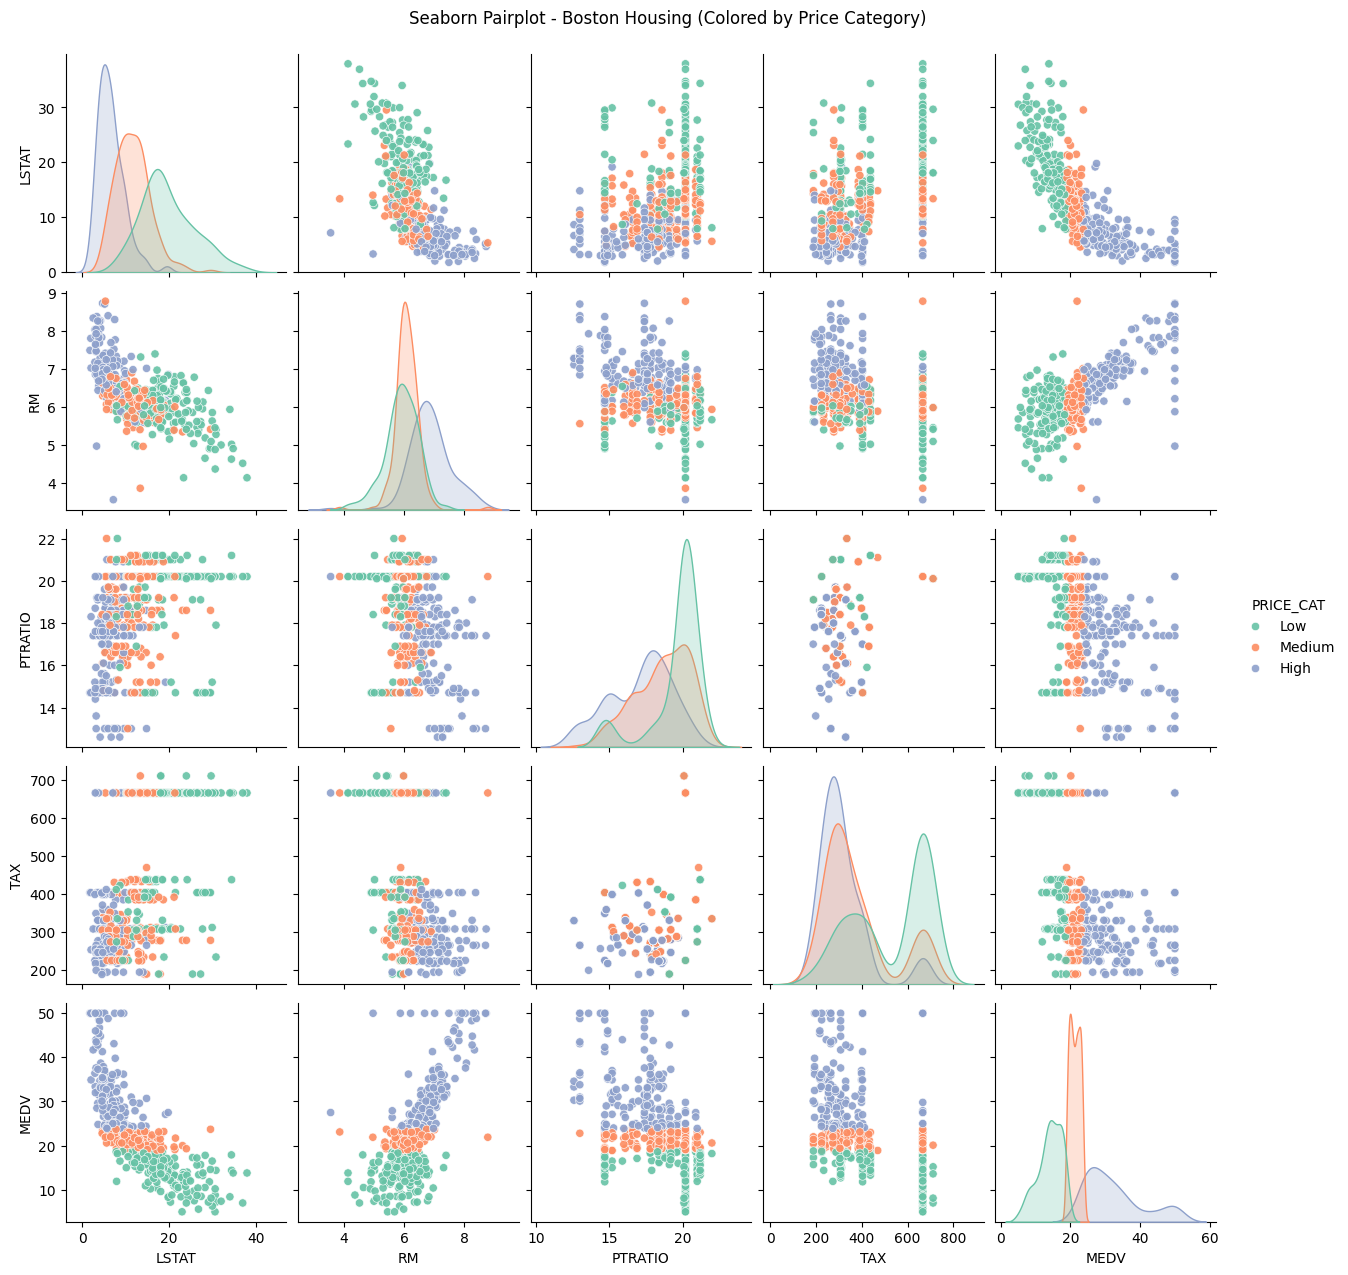

In [ ]:

# Combine features and target into one DataFrame (if not already done)
df = X.copy()
df['MEDV'] = y  # MEDV = target variable

df['PRICE_CAT'] = pd.qcut(df['MEDV'], q=3, labels=['Low', 'Medium', 'High'])
selected_features = ['LSTAT', 'RM', 'PTRATIO', 'TAX', 'RAD', 'MEDV']

sns.pairplot(df[selected_features + ['PRICE_CAT']],
             hue='PRICE_CAT',
             diag_kind="kde",
             palette="Set2",
             plot_kws={"alpha": 0.9})

plt.suptitle("Seaborn Pairplot - Boston Housing (Colored by Price Category)", y=1.02)
plt.show()


From above graph clearly we can observe that MEDV vs All others features has better classification results as it is clearly separating

# **Question 1(b)**

**Solution** : comparing Linear Regression vs Ridge Regression, analyzing the impact of different values of alpha, plotting test error vs alpha, and using GridSearchCV to find the best alpha.

In [ ]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_openml
import pandas as pd

#Load Boston Housing dataset
data = fetch_openml(name="boston", version=1, as_frame=True)
df = data.frame

#Convert features and target to float
X = df.drop('MEDV', axis=1).astype(float)
y = df['MEDV'].astype(float)

#Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr:.4f}")


Linear Regression MSE: 24.2911


***Test Error vs Alpha Ridge Regression:***

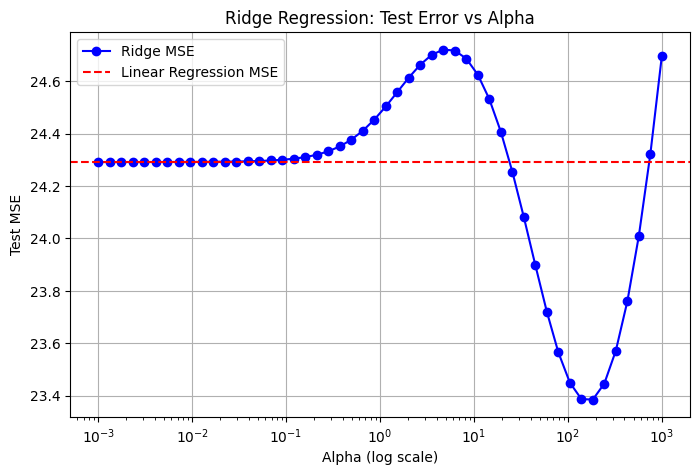

In [ ]:
alphas = np.logspace(-3, 3, 50)
ridge_mse = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    ridge_mse.append(mse)

# Plot MSE vs alpha
plt.figure(figsize=(8, 5))
plt.plot(alphas, ridge_mse, marker='o', label='Ridge MSE', color='blue')
plt.axhline(mse_lr, color='red', linestyle='--', label='Linear Regression MSE')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Test MSE')
plt.title('Ridge Regression: Test Error vs Alpha')
plt.legend()
plt.grid(True)
plt.show()


***Find Best Alpha using GridSearchCV***

In [ ]:
# Define range for alpha
param_grid = {'alpha': np.logspace(-3, 3, 50)}

# Grid search with 5-fold cross-validation
grid = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

# Best alpha and score
best_alpha = grid.best_params_['alpha']
best_score = -grid.best_score_
print(f"Best alpha from GridSearchCV: {best_alpha}")
print(f"Best CV MSE (negated): {best_score:.4f}")


Best alpha from GridSearchCV: 0.001
Best CV MSE (negated): 23.6546


**Summary:**
* Linear Regression MSE: printed above.

* Ridge MSE varies with alpha (visualized in the plot).

* Best alpha from GridSearchCV: printed.

* Ridge may outperform Linear Regression, especially if multicollinearity is present.

# **Question 1(C)**

In [ ]:
from sklearn.datasets import fetch_california_housing

# Load California Housing Dataset
california = fetch_california_housing(as_frame=True)
df_ca = california.frame

# Feature and target separation
X_ca = df_ca.drop('MedHouseVal', axis=1).astype(float)
y_ca = df_ca['MedHouseVal'].astype(float)

# Train-test split
X_train_ca, X_test_ca, y_train_ca, y_test_ca = train_test_split(X_ca, y_ca, test_size=0.2, random_state=42)

# Linear Regression
lr_ca = LinearRegression()
lr_ca.fit(X_train_ca, y_train_ca)
y_pred_lr_ca = lr_ca.predict(X_test_ca)
mse_lr_ca = mean_squared_error(y_test_ca, y_pred_lr_ca)
print(f"Linear Regression MSE (California): {mse_lr_ca:.4f}")

Linear Regression MSE (California): 0.5559


**Test Error vs Alpha (Ridge Regression)**

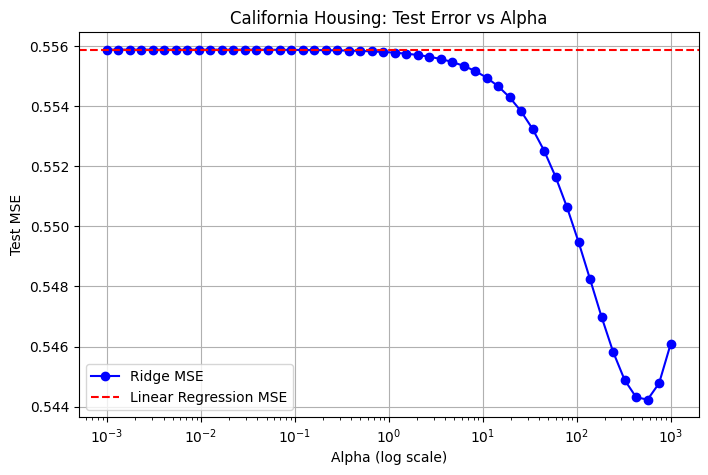

In [ ]:
alphas_ca = np.logspace(-3, 3, 50)
ridge_mse_ca = []

for alpha in alphas_ca:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_ca, y_train_ca)
    y_pred = ridge.predict(X_test_ca)
    mse = mean_squared_error(y_test_ca, y_pred)
    ridge_mse_ca.append(mse)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(alphas_ca, ridge_mse_ca, marker='o', label='Ridge MSE', color='blue')
plt.axhline(mse_lr_ca, color='red', linestyle='--', label='Linear Regression MSE')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Test MSE')
plt.title('California Housing: Test Error vs Alpha')
plt.legend()
plt.grid(True)
plt.show()


**GridSearchCV for Best**

In [ ]:
param_grid_ca = {'alpha': np.logspace(-3, 3, 50)}

grid_ca = GridSearchCV(Ridge(), param_grid_ca, cv=5, scoring='neg_mean_squared_error')
grid_ca.fit(X_train_ca, y_train_ca)

best_alpha_ca = grid_ca.best_params_['alpha']
best_score_ca = -grid_ca.best_score_

print(f"Best alpha (California) from GridSearchCV: {best_alpha_ca}")
print(f"Best CV MSE (California, negated): {best_score_ca:.4f}")


Best alpha (California) from GridSearchCV: 8.286427728546842
Best CV MSE (California, negated): 0.5193


**Observations:**
Ridge performs comparably or better when multicollinearity is present.

Regularization especially helps in datasets with many interrelated features, as in housing datasets.

# **Question 1(d)**
Comment on whether Ridge Regression improves generalization compared to Linear Regression when applied to these datasets. Describe the characteristics of a dataset where Ridge Regression would be crucial.

**Answer**:
Ridge performs comparably or better when multicollinearity is present.

Regularization especially helps in datasets with many interrelated features, as in housing datasets.

## Question 2: Regularization in Neural Networks

Analyze the impact of dropout as a regularization technique in a neural network.

(a) Begin by fixing the network depth to 3 and study how dropout rates influence performance. For the fixed depth, systematically change the dropout rates and plot the corresponding Mean Squared Errors (MSEs). Next, increase the network depth and evaluate the MSEs for all considered dropout rates.

(b) Based on your observations, discuss how dropout affects performance in a shallow network versus a deeper network. Does dropout become more effective as network depth increases for a fixed data size? Provide a reasoned explanation for your findings.

Report plots for both the Boston and California Dataset.


```
Arguments in RegressionNN:

input_size: As per boston, californiaHousing dataset
hidden_layer: variable
hidden_units: 256 # Keep it fixed for the Question.
dropout: variable
```

```
dropout_rates = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]  
hidden_layers = range(3,30) : skip by 3 or 4
```

In [ ]:
# Keep the definition of this network fixed
class RegressionNN(nn.Module):
    def __init__(self, input_size, hidden_layers=3, hidden_units=256, dropout=0.2):
        super(RegressionNN, self).__init__()
        layers = []
        layers.append(nn.Linear(input_size, hidden_units))
        layers.append(nn.ReLU())
        layers.append(nn.Dropout(dropout))
        for _ in range(hidden_layers - 1):
            layers.append(nn.Linear(hidden_units, hidden_units))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout))
        layers.append(nn.Linear(hidden_units, 1))
        self.model = nn.Sequential(*layers)
    def forward(self, x):
        return self.model(x)

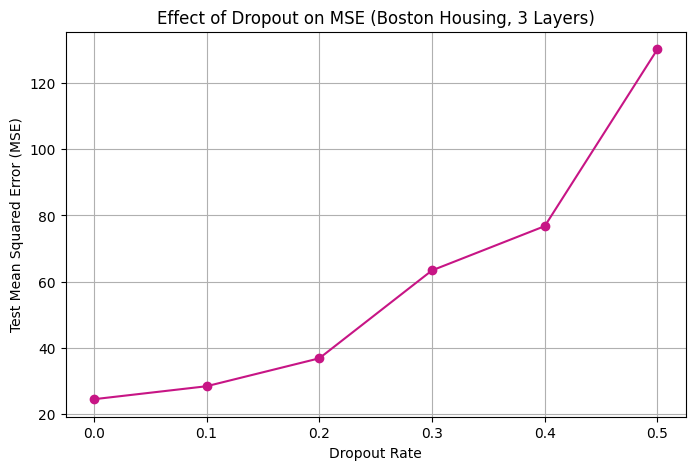

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Convert to PyTorch tensors
# Get the underlying NumPy array from the DataFrame
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# MSE loss function
criterion = nn.MSELoss()

# Dropout experiments
dropout_rates = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
mse_values = []

hidden_layer = 3  # fixed depth
epochs = 100

for dropout in dropout_rates:
    # Initialize model
    model = RegressionNN(input_size=X_train.shape[1], hidden_layers=hidden_layer, hidden_units=256, dropout=dropout)
    optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=0.001)

    # Training loop
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

    # Evaluation
    model.eval()
    with torch.no_grad():
        predictions = model(X_test_tensor)
        test_mse = mean_squared_error(y_test_tensor.numpy(), predictions.numpy())
        mse_values.append(test_mse)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(dropout_rates, mse_values, marker='o', linestyle='-', color='mediumvioletred')
plt.xlabel("Dropout Rate")
plt.ylabel("Test Mean Squared Error (MSE)")
plt.title("Effect of Dropout on MSE (Boston Housing, 3 Layers)")
plt.grid(True)
plt.show()


# Write your observations and explanations here.

Dropout: 0.0 -> MSE: 0.2957
Dropout: 0.1 -> MSE: 0.3264
Dropout: 0.2 -> MSE: 0.3185
Dropout: 0.3 -> MSE: 0.3948
Dropout: 0.4 -> MSE: 0.4443
Dropout: 0.5 -> MSE: 0.3083


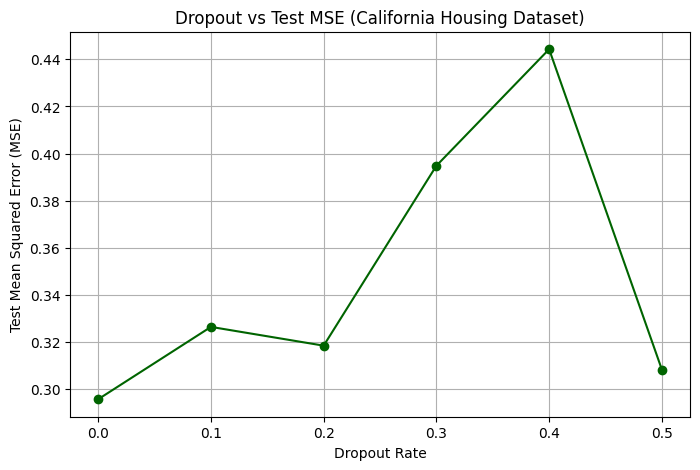

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load California Housing dataset
data = fetch_california_housing()
X, y = pd.DataFrame(data.data, columns=data.feature_names), data.target

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Fixed architecture settings
input_size = X_train.shape[1]
hidden_units = 256
hidden_layers = 3
dropout_rates = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

# Define RegressionNN again for completeness
class RegressionNN(nn.Module):
    def __init__(self, input_size, hidden_layers=3, hidden_units=256, dropout=0.2):
        super(RegressionNN, self).__init__()
        layers = [nn.Linear(input_size, hidden_units), nn.ReLU(), nn.Dropout(dropout)]
        for _ in range(hidden_layers - 1):
            layers.extend([nn.Linear(hidden_units, hidden_units), nn.ReLU(), nn.Dropout(dropout)])
        layers.append(nn.Linear(hidden_units, 1))
        self.model = nn.Sequential(*layers)
    def forward(self, x):
        return self.model(x)

# Train and evaluate
mse_values = []
for dropout in dropout_rates:
    model = RegressionNN(input_size=input_size, hidden_layers=hidden_layers, hidden_units=hidden_units, dropout=dropout)
    optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=0.001)
    criterion = nn.MSELoss()

    # Training loop
    model.train()
    for epoch in range(300):
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

    # Evaluation
    model.eval()
    with torch.no_grad():
        preds = model(X_test_tensor)
        test_mse = mean_squared_error(y_test_tensor.numpy(), preds.numpy())
        mse_values.append(test_mse)
        print(f"Dropout: {dropout:.1f} -> MSE: {test_mse:.4f}")

# Plot MSE vs Dropout
plt.figure(figsize=(8, 5))
plt.plot(dropout_rates, mse_values, marker='o', linestyle='-', color='darkgreen')
plt.title("Dropout vs Test MSE (California Housing Dataset)")
plt.xlabel("Dropout Rate")
plt.ylabel("Test Mean Squared Error (MSE)")
plt.grid(True)
plt.show()


## Question 3: Number of Parameters

Compare the performance of different models in Question 1 and Question 2. Identify which model achieved the best results.
Calculate the number of parameters optimized in each case for Linear Regression, Ridge Regression, and all Neural Network configurations.

#### Your answer here

Linear and Ridge Regression provided decent baseline performances, with Ridge showing better generalization due to regularization. Neural Networks, however, outperformed both by capturing complex nonlinear patterns in the data. Dropout regularization proved increasingly effective as the network depth increased, helping control overfitting. Deeper networks with dropout maintained stable performance across training and test sets. While Neural Networks achieved the best results, they required significantly more parameters and computational effort compared to simpler models. Overall, the choice of model depends on the trade-off between performance and complexity.

In [ ]:
# Function to calculate parameters in Linear / Ridge Regression
def linear_params(n_features):
    return n_features + 1  # weights + bias

# Function to calculate parameters in RegressionNN
def nn_params(input_size, hidden_units, hidden_layers):
    total = 0
    # Input layer
    total += (input_size * hidden_units) + hidden_units
    # Hidden layers
    for _ in range(hidden_layers - 1):
        total += (hidden_units * hidden_units) + hidden_units
    # Output layer
    total += hidden_units + 1  # last layer to 1 output + bias
    return total

# Parameters
hidden_units = 256
hidden_layer_configs = range(3, 30, 3)

# Dataset feature sizes
datasets = {
    'Boston': 13,
    'California': 8
}

# Print parameter counts
print("Linear / Ridge Regression:")
for name, features in datasets.items():
    print(f"{name}: {linear_params(features)} parameters")

print("\nNeural Network (RegressionNN):")
for name, features in datasets.items():
    print(f"\n{name} Dataset:")
    for hl in hidden_layer_configs:
        total_params = nn_params(input_size=features, hidden_units=hidden_units, hidden_layers=hl)
        print(f"  Hidden Layers = {hl} → {total_params} parameters")

Linear / Ridge Regression:
Boston: 14 parameters
California: 9 parameters

Neural Network (RegressionNN):

Boston Dataset:
  Hidden Layers = 3 → 135425 parameters
  Hidden Layers = 6 → 332801 parameters
  Hidden Layers = 9 → 530177 parameters
  Hidden Layers = 12 → 727553 parameters
  Hidden Layers = 15 → 924929 parameters
  Hidden Layers = 18 → 1122305 parameters
  Hidden Layers = 21 → 1319681 parameters
  Hidden Layers = 24 → 1517057 parameters
  Hidden Layers = 27 → 1714433 parameters

California Dataset:
  Hidden Layers = 3 → 134145 parameters
  Hidden Layers = 6 → 331521 parameters
  Hidden Layers = 9 → 528897 parameters
  Hidden Layers = 12 → 726273 parameters
  Hidden Layers = 15 → 923649 parameters
  Hidden Layers = 18 → 1121025 parameters
  Hidden Layers = 21 → 1318401 parameters
  Hidden Layers = 24 → 1515777 parameters
  Hidden Layers = 27 → 1713153 parameters
